## A Quant Experiment Using AAPL As An Example

First install yfinance for data acquisition

In [2]:
!pip3 install yfinance

/bin/bash: /home/yuanyuan/anaconda3/envs/mymtce/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/44/1b/0771c38e65ad23e25368b5e07c920054774b8d12477a4fad116bf500de73/lxml-4.9.3-cp38-cp38-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2022.5 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

import the necessary libraries

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [97]:
data = yf.download("AAPL", "2002-01-01", "2023-11-22")

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,0.393750,0.416071,0.392143,0.416071,0.352695,529496800
2002-01-03,0.410714,0.424107,0.406607,0.421071,0.356933,612007200
2002-01-04,0.416786,0.427679,0.410536,0.423036,0.358599,409976000
2002-01-07,0.423571,0.428571,0.406250,0.408929,0.346641,444584000
2002-01-08,0.406250,0.411607,0.401071,0.403750,0.342251,450038400


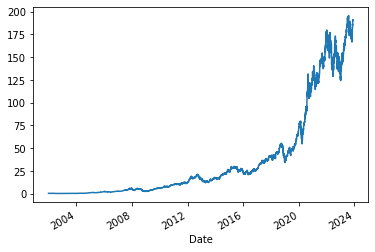

In [6]:
data['Adj Close'].plot()
plt.show()

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data["ATH"] = data["High"].cummax()

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,ATH
Date,,,,,,,
2002-01-02,0.393750,0.416071,0.392143,0.416071,0.352695,529496800,0.416071
2002-01-03,0.410714,0.424107,0.406607,0.421071,0.356933,612007200,0.424107
2002-01-04,0.416786,0.427679,0.410536,0.423036,0.358599,409976000,0.427679
2002-01-07,0.423571,0.428571,0.406250,0.408929,0.346641,444584000,0.428571
2002-01-08,0.406250,0.411607,0.401071,0.403750,0.342251,450038400,0.428571


In [11]:
data['PercentageChange'] = ((data['Low'] - data['ATH']) / data['ATH']) * 100

In [53]:
data["below_thres"] = data["PercentageChange"] <= -10

In [54]:
data["below_thres"].diff().eq(True).sum()

246

In [55]:
fallen_more_than_50_percent = data[data['PercentageChange'] <= -60]

In [56]:
fallen_more_than_50_percent

,Open,High,Low,Close,Adj Close,Volume,ATH,PercentageChange,below_thres
Date,,,,,,,,,
2008-11-20,3.044286,3.087500,2.857143,2.874643,2.436777,1716814400,7.248571,-60.583362,True
2008-11-21,2.926071,3.004286,2.826429,2.949286,2.500050,1569271200,7.248571,-61.007088,True
2009-01-15,2.877500,3.004286,2.858929,2.977857,2.524269,1831634000,7.248571,-60.558723,True
2009-01-16,3.010714,3.013571,2.871429,2.940357,2.492482,1047625600,7.248571,-60.386275,True
2009-01-20,2.926071,2.928571,2.792857,2.792857,2.367449,919914800,7.248571,-61.470241,True
2009-01-21,2.835357,2.960000,2.832500,2.958214,2.507619,1089270000,7.248571,-60.923332,True


In [57]:
interest_date = data[data['below_thres'] == True]

In [58]:
interest_date

,Open,High,Low,Close,Adj Close,Volume,ATH,PercentageChange,below_thres
Date,,,,,,,,,
2002-01-09,0.407143,0.409464,0.380000,0.386607,0.327719,327835200,0.428571,-11.333243,True
2002-01-10,0.378929,0.383214,0.361607,0.379107,0.321361,452737600,0.428571,-15.624950,True
2002-01-11,0.381964,0.390000,0.367857,0.375893,0.318637,348801600,0.428571,-14.166609,True
2002-01-14,0.375179,0.382143,0.373214,0.377679,0.320151,415996000,0.428571,-12.916642,True
2002-01-15,0.380714,0.388571,0.378750,0.387500,0.328476,290320800,0.428571,-11.624910,True
...,...,...,...,...,...,...,...,...,...
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.545319,44846000,198.229996,-15.300410,True
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.741104,56934900,198.229996,-14.180498,True
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.336380,77334800,198.229996,-11.486652,True


In [59]:
changing = data[data["below_thres"].diff().eq(True)]

In [64]:
changing[changing["below_thres"] == True]

,Open,High,Low,Close,Adj Close,Volume,ATH,PercentageChange,below_thres
Date,,,,,,,,,
2002-01-09,0.407143,0.409464,0.380000,0.386607,0.327719,327835200,0.428571,-11.333243,True
2002-01-23,0.389286,0.411429,0.385536,0.411071,0.348456,443279200,0.428571,-10.041511,True
2002-02-08,0.435714,0.440000,0.417321,0.429107,0.363745,355331200,0.463929,-10.046365,True
2002-02-19,0.424286,0.426250,0.401429,0.403929,0.342402,390258400,0.463929,-13.471889,True
2002-03-06,0.419286,0.434643,0.409464,0.429821,0.364351,226206400,0.463929,-11.739942,True
2002-03-21,0.426071,0.433929,0.415357,0.433393,0.367379,616352800,0.463929,-10.469706,True
2002-03-25,0.429821,0.430179,0.415000,0.416964,0.353452,262830400,0.463929,-10.546658,True
2002-04-01,0.417500,0.441071,0.415714,0.436786,0.370255,199046400,0.463929,-10.392755,True
2002-04-25,0.420714,0.434643,0.420536,0.430714,0.365108,194202400,0.467321,-10.011319,True


In [63]:
import pandas as pd


In [96]:
initial_balance = 1
balance = initial_balance
shares = 0

# Buy threshold and sell threshold percentages
buy_threshold = -20
sell_threshold = 100

# Flags to keep track of buy and sell decisions
buy_signal = False
sell_signal = False

# Iterate through the DataFrame
for index, row in data.iterrows():
    if row['PercentageChange'] <= buy_threshold and not buy_signal:
        # Buy condition
        buy_signal = True
        sell_signal = False
        shares += balance / row['Low']
        balance = 0
        print(f"Buying on {index} at {row['Low']}")

    elif row['PercentageChange'] >= sell_threshold and not sell_signal and shares > 0:
        # Sell condition
        sell_signal = True
        buy_signal = False
        balance += shares * row['High']
        shares = 0
        print(f"Selling on {index} at {row['High']}")

# If there are remaining shares at the end, sell them at the last available price
if shares > 0:
    balance += shares * data.iloc[-1]['Close']
    print(f"Selling remaining shares on {data.iloc[-1]} at {data.iloc[-1]['Close']}")

# Calculate the final balance
final_balance = balance

initial_high = data.iloc[0]['High']
final_high = data.iloc[-1]['High']
baseline_profit = final_high / initial_high

# Print the result
print(f"Initial Balance: ${initial_balance:.2f}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Profit/Loss: ${final_balance - initial_balance:.2f}")
print(f"Baseline Profit: ${data.iloc[-1]['High'] / data.iloc[0]['High']:.2f}")

Buying on 2002-06-07 00:00:00 at 0.3737500011920929
Selling remaining shares on Open                191.410004
High                191.520004
Low                 189.740005
Close               190.639999
Adj Close           190.639999
Volume                38082700
ATH                 198.229996
PercentageChange     -4.282899
below_thres              False
Name: 2023-11-21 00:00:00, dtype: object at 190.63999938964844
Initial Balance: $1.00
Final Balance: $510.07
Profit/Loss: $509.07
Baseline Profit: $460.31
